This notebook consists of exercises in the book Introduction to Random Matrices, by Livan et al.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## intro exercises

# make our first random matrix:
rand_mat = np.random.randn(6,6)

In [5]:
np.round(rand_mat,3)

array([[-0.546,  0.784,  0.139, -0.412, -0.82 , -0.913],
       [-0.939,  1.173,  0.337, -0.103, -1.004,  0.347],
       [-0.534, -1.591, -0.033,  1.009,  0.57 , -0.115],
       [-0.325,  0.602, -0.18 , -1.245, -0.051,  0.57 ],
       [-0.985,  1.66 , -0.534, -0.05 , -2.844, -1.103],
       [ 0.054, -0.23 ,  1.371, -0.41 , -0.15 , -0.668]])

In [6]:
# let's look at the eigenvalues
evals, evecs = np.linalg.eig(rand_mat)

In [7]:
evals

array([ 0.53166474+1.16956602j,  0.53166474-1.16956602j,
       -2.67988814+0.j        , -0.73432388+0.84794491j,
       -0.73432388-0.84794491j, -1.07732676+0.j        ])

In [9]:
# as we see, they are complex.
# but now let's symmetrize, and we can make the eigenvalues real

In [10]:
symmetrized_rand_mat = rand_mat + np.transpose(rand_mat)

sym_evals, sym_evecs = np.linalg.eig(symmetrized_rand_mat)

In [11]:
sym_evals

array([-6.7961172 ,  2.97829938,  1.0533596 , -0.8208007 , -2.94706165,
       -1.79274582])

In [38]:
# now let's see what the distribution of eigenvalues of this matrix looks like

def rand_eigenvalues(dimension, symmetrized = True, ensemble = 'GOE'):
    # returns the eigenvalues of a random matrix (standard Gaussian) of size dimension by dimension.  
    # If (default) the flag 'symmetrized' is set to True, the random matrix is symmetrized first
    
    if ensemble=='GOE':
        rand_mat = np.random.randn(dimension,dimension)
    elif ensemble == 'GUE':
        rand_mat = np.random.randn(dimension, dimension) + 1j*np.random.randn(dimension, dimension)
    
    if symmetrized:
        rand_mat = rand_mat + np.conj(np.transpose(rand_mat))
        
    evals, evecs = np.linalg.eig(rand_mat)
    return sorted(evals)
    

In [44]:
# we construct the distribution by sampling

nRuns = 10000
matrix_dimension = 6

eigenvalue_array = np.zeros(shape = (nRuns, matrix_dimension))

symmetrized = True

for run in range(nRuns):
    eigenvalue_array[run,:] = rand_eigenvalues(matrix_dimension, symmetrized, ensemble = 'GOE')
    

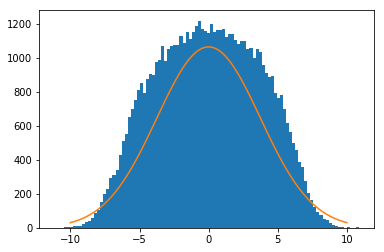

In [45]:
plt.hist(eigenvalue_array.flatten(), bins = 100 );
plt.plot(x,y*len(eigenvalue_array.flatten())/6)

In [36]:
x = np.linspace(-10,10,100)
std = np.sqrt(np.var(eigenvalue_array.flatten()))
y = np.exp(-np.power(x,2)/(2*std**2))/np.sqrt(2*np.pi*std**2)

In [43]:
rand_eigenvalues(dimension=6, ensemble = 'GUE')

[(-7.4244316425322214-7.4360843570071226e-16j),
 (-3.8487184412061617-4.218524646094745e-16j),
 (-1.1290868299396977+1.8688160270159009e-17j),
 (2.385802146735152+6.238221896568565e-17j),
 (4.329621363664093-3.2353798764785565e-16j),
 (6.1315405158466767+1.8668318163452547e-16j)]